## connectionist models are not reliable for certain tasks

In [ ]:
# https://web.media.mit.edu/~minsky/papers/SymbolicVs.Connectionist.html
# http://wangjieshu.com/2017/12/23/symbol-vs-connectionism-a-closing-gap-in-artificial-intelligence/

### Example

In [ ]:
"""Neural net to take the product of three numbers 
After https://gist.github.com/qpwo/34983724ed9333225974191798bb672d
"""
from tensorflow.keras import models, layers
import numpy as np

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

x = np.random.random((100, 3))
y = np.prod(x, axis=1).reshape(100, 1)

model = models.Sequential([
    layers.Dense(3, activation='relu', input_shape=(3,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation='relu')
])
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(x, y, epochs=1000)

# small test, to see quality of results

x2 = np.random.random((5, 3))
y2 = np.prod(x2, axis=1).reshape(5,1)
p2 = model.predict(x2)

print("x:\n", x2)
print("y:\n", y2)
print("predicted:\n", p2)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2311
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2169
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1970
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1862
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1690
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1632
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 13/1000
4/4 [==============================

In [8]:
!conda install -c milagraph -c conda-forge graphvite cudatoolkit=$(nvcc -V | grep -Po "(?<=V)\d+.\d+")


| 

In [ ]:
# https://optlang.readthedocs.io/en/latest/
# https://pyomo.readthedocs.io/en/stable/pyomo_overview/math_modeling.html
# https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html
# https://python-mip.readthedocs.io/en/latest/examples.html#resource-constrained-project-scheduling

## Applications

* example: knapsack problem: https://python-mip.readthedocs.io/en/latest/examples.html#resource-constrained-project-scheduling

* Production and Distribution Planning
* Supply chain decisions

In [ ]:
linear programming in python
* Pyomo - Coopr
* Pulp

In [10]:
!export LD_LIBRARY_PATH=/usr/local/cuda-9.0/lib64/ && sudo ldconfig

[sudo] password for ben: 


In [9]:
# conda install -c milagraph -c conda-forge graphvite cudatoolkit=$(nvcc -V | grep -Po "(?<=V)\d+.\d+")
# alternatively (if above fails):
# download dep from here https://anaconda.org/milagraph/graphvite/files
# install libgoogle-glog0v5 (debian)
# pip install easydict
import graphvite

ImportError: /usr/local/cuda-9.0/lib64/libcurand.so.9.2: version `libcurand.so.9.2' not found (required by /home/ben/anaconda3/lib/python3.7/site-packages/graphvite/lib/libgraphvite.so)

In [4]:
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic
logic._counter._value = 0
# sudo apt install prover9

In [6]:
# from http://www.nltk.org/howto/inference.html
from nltk.sem.Expression import fromstring
p1 = fromstring('man(socrates)')
p2 = fromstring('all x.(man(x) -> mortal(x))')
c  = fromstring('mortal(socrates)')
Prover9().prove(c, [p1,p2])
# https://www.cs.unm.edu/~mccune/prover9/manual/2009-11A/

True

In [7]:
TableauProver().prove(c, [p1, p2])

True

In [8]:
ResolutionProver().prove(c, [p1, p2], verbose=True)

[1] {-mortal(socrates)}     A 
[2] {man(socrates)}         A 
[3] {-man(z2), mortal(z2)}  A 
[4] {-man(socrates)}        (1, 3) 
[5] {mortal(socrates)}      (2, 3) 
[6] {}                      (1, 5) 



True

In [ ]:
graphvite baseline quick start

In [ ]:
# https://python-mip.readthedocs.io/en/latest/examples.html#resource-constrained-project-scheduling

In [10]:
pip install pyRDF2Vec

     |████████████████████████████████| 389kB 3.7MB/s eta 0:00:01
     |████████████████████████████████| 235kB 27.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 9.7MB/s  eta 0:00:01
  Created wheel for pyRDF2Vec: filename=pyRDF2Vec-0.0.5-cp37-none-any.whl size=13336 sha256=acab4020e73507b7555c06e79ab6789005561b9c45e4b2adf72a3578871c3714
  Stored in directory: /home/ben/.cache/pip/wheels/8a/e6/c1/17604dde615852b3c708b899b35876754ea97f17f94daa93ca
Successfully built pyRDF2Vec
Note: you may need to restart the kernel to use updated packages.


In [177]:
from rdf2vec.converters import create_kg
import pandas as pd

zoo = pd.read_csv('zoo.csv')

In [16]:
cols = list(zoo.columns)
cols

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [180]:
zoo.columns[zoo.nunique() == 2]

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [181]:
binary_cols = zoo.columns[zoo.nunique() == 2]
binary_cols

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [182]:
for col in binary_cols:
    zoo[col] = zoo[col].astype(bool)

In [183]:
zoo.dtypes

animal_name    object
hair             bool
feathers         bool
eggs             bool
milk             bool
airborne         bool
aquatic          bool
predator         bool
toothed          bool
backbone         bool
breathes         bool
venomous         bool
fins             bool
legs            int64
tail             bool
domestic         bool
catsize          bool
class_type      int64
dtype: object

In [13]:
len(zoo)

101

In [820]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1


In [49]:
training_size = int(len(zoo) * 0.8)

In [623]:
all_labels = {
    i+1: c for i, c in enumerate(
        [
        'Mammal',
        'Bird',
        'Reptile',
        'Fish',
        'Amphibian',
        'Bug',
        'Invertebrate'
        ])
}

In [635]:
triplets = []
def get_triplets(row, col):
    """return triplets for binary and integer elements
    
    Format: (s, p, o)
    """
    if col == 'class_type':
        return  (
            all_labels[row[col]],
            'is_a',  # 'has' + col
            row['animal_name'],
        )
    # integer properties:
    if col in ['legs']:
        #if row[col] > 0:
        return (
            row['animal_name'],
            'has' + col,
            str(row[col]) + '_legs'
        )
        #else:
        #    return ()
    # binary properties:
    if row[col]:
        return (
            row['animal_name'],
            'has',  # if row[col] else 'hasno' + col,
            str(col)
        )
    else:
        return ()

for i, row in zoo.iterrows():
    for col in cols:
        if col == 'animal_name':
            continue
        if col == 'class_type' and i > training_size:
                continue
        triplet = get_triplets(row, col)
        if triplet:
            triplets.append(triplet)
    #if i > 5:
    #    break
    

from rdf2vec.graph import KnowledgeGraph, Vertex

label_predicates = [] #[ 'is_a' ]
kg = KnowledgeGraph()
for (s, p, o) in triples:
    if p not in label_predicates:
        s_v = Vertex(str(s))
        o_v = Vertex(str(o))
        p_v = Vertex(str(p), predicate=True, _from=s_v, _to=o_v)
        kg.add_vertex(s_v)
        kg.add_vertex(p_v)
        kg.add_vertex(o_v)
        kg.add_edge(s_v, p_v)
        kg.add_edge(p_v, o_v)

In [636]:
len(triplets)

842

In [637]:
triplets[:20]

[('aardvark', 'has', 'hair'),
 ('aardvark', 'has', 'milk'),
 ('aardvark', 'has', 'predator'),
 ('aardvark', 'has', 'toothed'),
 ('aardvark', 'has', 'backbone'),
 ('aardvark', 'has', 'breathes'),
 ('aardvark', 'haslegs', '4_legs'),
 ('aardvark', 'has', 'catsize'),
 ('Mammal', 'is_a', 'aardvark'),
 ('antelope', 'has', 'hair'),
 ('antelope', 'has', 'milk'),
 ('antelope', 'has', 'toothed'),
 ('antelope', 'has', 'backbone'),
 ('antelope', 'has', 'breathes'),
 ('antelope', 'haslegs', '4_legs'),
 ('antelope', 'has', 'tail'),
 ('antelope', 'has', 'catsize'),
 ('Mammal', 'is_a', 'antelope'),
 ('bass', 'has', 'eggs'),
 ('bass', 'has', 'aquatic')]

In [535]:
triplets[-20:]

[('wasp', 'haslegs', 'legs_6'),
 ('wolf', 'hashair', 'hair'),
 ('wolf', 'hasmilk', 'milk'),
 ('wolf', 'haspredator', 'predator'),
 ('wolf', 'hastoothed', 'toothed'),
 ('wolf', 'hasbackbone', 'backbone'),
 ('wolf', 'hasbreathes', 'breathes'),
 ('wolf', 'haslegs', 'legs_4'),
 ('wolf', 'hastail', 'tail'),
 ('wolf', 'hascatsize', 'catsize'),
 ('worm', 'haseggs', 'eggs'),
 ('worm', 'hasbreathes', 'breathes'),
 ('worm', 'haslegs', 'legs_0'),
 ('wren', 'hasfeathers', 'feathers'),
 ('wren', 'haseggs', 'eggs'),
 ('wren', 'hasairborne', 'airborne'),
 ('wren', 'hasbackbone', 'backbone'),
 ('wren', 'hasbreathes', 'breathes'),
 ('wren', 'haslegs', 'legs_2'),
 ('wren', 'hastail', 'tail')]

In [575]:
kg = create_kg(triplets, label_predicates=label_predicates)

100%|██████████| 842/842 [00:00<00:00, 29461.95it/s]


In [576]:
kg

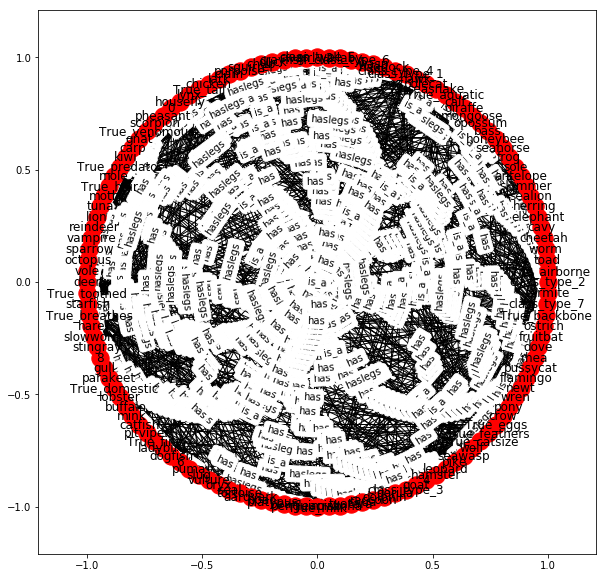

In [577]:
kg.visualise()

In [578]:
entities = list(zoo.animal_name)

In [579]:
from rdf2vec import RDF2VecTransformer
from rdf2vec.walkers import RandomWalker, CommunityWalker
import numpy as np

# We specify the depth and maximum number of walks per entity
random_walker = RandomWalker(5, float('inf'))

transformer = RDF2VecTransformer(vector_size=50, walkers=[random_walker], sg=1)
# Entities should be a list of URIs that can be found in the KG
embeddings = np.array(transformer.fit_transform(kg, entities))

Extracted 754 walks for 101 instances!


/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [580]:
embeddings.shape

(101, 50)

In [581]:
zoo.values[training_size:, :-1]

array([['slowworm', False, False, True, False, False, False, True, True,
        True, True, False, False, 0, True, False, False],
       ['slug', False, False, True, False, False, False, False, False,
        False, True, False, False, 0, False, False, False],
       ['sole', False, False, True, False, False, True, False, True,
        True, False, False, True, 0, True, False, False],
       ['sparrow', False, True, True, False, True, False, False, False,
        True, True, False, False, 2, True, False, False],
       ['squirrel', True, False, False, True, False, False, False, True,
        True, True, False, False, 2, True, False, False],
       ['starfish', False, False, True, False, False, True, True, False,
        False, False, False, False, 5, False, False, False],
       ['stingray', False, False, True, False, False, True, True, True,
        True, False, True, True, 0, True, False, True],
       ['swan', False, True, True, False, True, True, False, False, True,
        True, 

In [582]:
zoo.values[:training_size, 1:-1]

array([[True, False, False, ..., False, False, True],
       [True, False, False, ..., True, False, True],
       [False, False, True, ..., True, False, False],
       ...,
       [False, False, True, ..., False, False, False],
       [False, True, True, ..., True, False, False],
       [False, True, True, ..., True, False, False]], dtype=object)

In [583]:
# Fit a support vector machine on train embeddings and evaluate on test
clf = SVC(random_state=42)
clf.fit(embeddings[:training_size, :], zoo.class_type[:training_size])

test_labels = zoo.class_type[training_size:]
test_embeddings = embeddings[training_size:, :]
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.23809523809523808
[[5 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]]


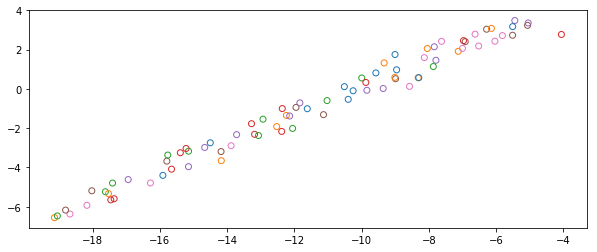

In [585]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import itertools

walk_tsne = TSNE(random_state=42)
X_walk_tsne = walk_tsne.fit_transform(embeddings)

# Define a color map

palette = itertools.cycle(sns.color_palette())
color_map = {}
for i, label in enumerate(set(all_labels)):
    color_map[label] = next(palette)

# Plot the train embeddings
plt.figure(figsize=(10, 4))
plt.scatter(
    X_walk_tsne[:training_size, 0],
    X_walk_tsne[:training_size, 1],
    edgecolors=[color_map[i] for i in all_labels[:training_size]],
    facecolors='none',
)

In [587]:
[color_map[i] for i in all_labels[:training_size]]

[(0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

In [588]:
# baseline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


clf = SVC(random_state=42)
clf.fit(zoo.values[:training_size, 1:-1], zoo.class_type[:training_size])

test_labels = zoo.class_type[training_size:]
test_embeddings = zoo.values[training_size:, 1:-1]
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.8571428571428571
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 3]]


In [589]:
embeddings[:training_size, :]

array([[ 1.3603149e-01, -2.8470138e-01,  5.4165583e-02, ...,
        -8.9113824e-03, -6.0613714e-02, -2.1155111e-01],
       [ 1.2303162e-01, -2.3974222e-01,  4.3969065e-02, ...,
         4.6277014e-03, -5.4651506e-02, -1.8632300e-01],
       [ 1.3791825e-01, -2.7287260e-01,  4.2850599e-02, ...,
         3.0703400e-03, -6.9984242e-02, -2.1010447e-01],
       ...,
       [ 1.3424560e-01, -2.9502484e-01,  4.7125798e-02, ...,
        -2.6206900e-03, -6.6306978e-02, -2.1643740e-01],
       [ 1.7086963e-01, -3.3585918e-01,  5.7754584e-02, ...,
         2.4902358e-04, -7.9654820e-02, -2.5659356e-01],
       [ 1.2375790e-01, -2.6097926e-01,  4.5595769e-02, ...,
         5.0233738e-03, -6.3163765e-02, -1.9381219e-01]], dtype=float32)

simple reasoning with kanren

applying a connectionist model
* https://docs.ampligraph.org/en/1.3.1/examples.html
    
see also:

reasoning about the real-world
* http://www.actioncores.org/apidoc.html#pracinference
* https://github.com/INK-USC/KagNet

about unification: 
* https://eli.thegreenplace.net/2018/unification/

about knowledge graph embeddings:
* https://graphvite.io/

lerning on graphs: Open Graph Benchmark: Datasets for Machine Learning on Graphs, Hu and others, 2020
* https://arxiv.org/pdf/2005.00687.pdf

In [641]:
!pip install -U karateclub networkx node2vec pygraphviz

Requirement already up-to-date: karateclub in ./anaconda3/lib/python3.7/site-packages (1.0.5)
Requirement already up-to-date: networkx in ./anaconda3/lib/python3.7/site-packages (2.4)
Requirement already up-to-date: node2vec in ./anaconda3/lib/python3.7/site-packages (0.3.2)
     |████████████████████████████████| 122kB 1.4MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /home/ben/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-afndeyeu/pygraphviz/setup.py'"'"'; __file__='"'"'/tmp/pip-install-afndeyeu/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-2gcb2thn --python-tag cp37
       cwd: /tmp/pip-install-afndeyeu/pygraphviz/
  Complete output (94 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/

Failed to build pygraphviz
  Found existing installation: pygraphviz 1.3
    Uninstalling pygraphviz-1.3:
      Successfully uninstalled pygraphviz-1.3
  Running setup.py install for pygraphviz ... error
    ERROR: Command errored out with exit status 1:
     command: /home/ben/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-afndeyeu/pygraphviz/setup.py'"'"'; __file__='"'"'/tmp/pip-install-afndeyeu/pygraphviz/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-cyh662di/install-record.txt --single-version-externally-managed --compile
         cwd: /tmp/pip-install-afndeyeu/pygraphviz/
    Complete output (32 lines):
    running install
    Trying dpkg
    Trying pkg-config
    Package libcgraph was not found in the pkg-config search path.
    Perhaps you should add the directory conta

In [609]:
import matplotlib.pyplot as plt
import networkx as nx

In [638]:
nx_graph = nx.Graph()

In [639]:
triplets

[('aardvark', 'has', 'hair'),
 ('aardvark', 'has', 'milk'),
 ('aardvark', 'has', 'predator'),
 ('aardvark', 'has', 'toothed'),
 ('aardvark', 'has', 'backbone'),
 ('aardvark', 'has', 'breathes'),
 ('aardvark', 'haslegs', '4_legs'),
 ('aardvark', 'has', 'catsize'),
 ('Mammal', 'is_a', 'aardvark'),
 ('antelope', 'has', 'hair'),
 ('antelope', 'has', 'milk'),
 ('antelope', 'has', 'toothed'),
 ('antelope', 'has', 'backbone'),
 ('antelope', 'has', 'breathes'),
 ('antelope', 'haslegs', '4_legs'),
 ('antelope', 'has', 'tail'),
 ('antelope', 'has', 'catsize'),
 ('Mammal', 'is_a', 'antelope'),
 ('bass', 'has', 'eggs'),
 ('bass', 'has', 'aquatic'),
 ('bass', 'has', 'predator'),
 ('bass', 'has', 'toothed'),
 ('bass', 'has', 'backbone'),
 ('bass', 'has', 'fins'),
 ('bass', 'haslegs', '0_legs'),
 ('bass', 'has', 'tail'),
 ('Fish', 'is_a', 'bass'),
 ('bear', 'has', 'hair'),
 ('bear', 'has', 'milk'),
 ('bear', 'has', 'predator'),
 ('bear', 'has', 'toothed'),
 ('bear', 'has', 'backbone'),
 ('bear', 'has

In [614]:
?nx_graph.add_edge

In [640]:
nx_graph = nx.Graph()
for (a, p, b) in triplets:
    nx_graph.add_edge(a, b)

In [642]:
A = nx.nx_agraph.to_agraph(nx_graph)

In [643]:
print(A.string()) # print to screen

strict graph "" {
	aardvark -- hair;
	aardvark -- milk;
	aardvark -- predator;
	aardvark -- toothed;
	aardvark -- backbone;
	aardvark -- breathes;
	aardvark -- "4_legs";
	aardvark -- catsize;
	aardvark -- Mammal;
	hair -- antelope;
	hair -- bear;
	hair -- boar;
	hair -- buffalo;
	hair -- calf;
	hair -- cavy;
	hair -- cheetah;
	hair -- deer;
	hair -- elephant;
	hair -- fruitbat;
	hair -- giraffe;
	hair -- girl;
	hair -- goat;
	hair -- gorilla;
	hair -- hamster;
	hair -- hare;
	hair -- honeybee;
	hair -- housefly;
	hair -- leopard;
	hair -- lion;
	hair -- lynx;
	hair -- mink;
	hair -- mole;
	hair -- mongoose;
	hair -- moth;
	hair -- opossum;
	hair -- oryx;
	hair -- platypus;
	hair -- polecat;
	hair -- pony;
	hair -- puma;
	hair -- pussycat;
	hair -- raccoon;
	hair -- reindeer;
	hair -- seal;
	hair -- sealion;
	hair -- squirrel;
	hair -- vampire;
	hair -- vole;
	hair -- wallaby;
	hair -- wasp;
	hair -- wolf;
	milk -- antelope;
	milk -- bear;
	milk -- boar;
	milk -- buffalo;
	milk -- calf;

In [644]:
nx_graph

In [664]:
class Vocabulary:
    """Vocabulary class. Wrapper for dictionaries"""
    label2id = {}
    id2label = {}
    def lookup(self, word):
        """get word id; if not present, insert"""
        if word in self.label2id:
            return self.label2id[word]
        ind = len(self.label2id)
        self.label2id[word] = ind
        return ind
    
    def inverse_lookup(self, index):
        if len(self.id2label) == 0:
            self.id2label = {
                ind: label
                for label, ind in self.label2id.items()
            }
        return self.id2label.get(index, None)
        
vocab = Vocabulary()
nx_graph = nx.Graph()
for (a, p, b) in triplets:
    id1, id2 = vocab.lookup(a), vocab.lookup(b)
    nx_graph.add_edge(id1, id2)

In [665]:
vocab.inverse_lookup(2)

'milk'

In [677]:
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127))

In [680]:
trainamals = [
    vocab.label2id[animal]
    for animal in zoo.animal_name.values[:training_size]
]

In [681]:
testimals = [
    vocab.label2id[animal]
    for animal in zoo.animal_name.values[training_size:]
]

In [710]:
import networkx as nx
from karateclub.node_embedding.neighbourhood import Walklets

model_w = Walklets(dimensions=5)
model_w.fit(nx_graph)
embedding = model_w.get_embedding()

In [711]:
# Fit a support vector machine on train embeddings and evaluate on test
clf = SVC(random_state=42)
clf.fit(embedding[trainamals, :], zoo.class_type[:training_size])

test_labels = zoo.class_type[training_size:]
test_embeddings = embedding[testimals, :]
print(end='Support Vector Machine: Accuracy: ')
print('{:.3f}'accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.8095238095238095
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 3]]


In [721]:
from karateclub import LabelPropagation

model_lp = LabelPropagation()
model_lp.fit(nx_graph)
cluster_membership = model_lp.get_memberships()
cluster_membership = np.array([cluster_membership[node] for node in range(len(cluster_membership))])

In [725]:
cluster_membership.reshape(-1, 1).shape

(128, 1)

In [729]:
clf = SVC(random_state=42)
clf.fit(
    np.concatenate(
        [
            #zoo.values[:training_size, 1:-1],
            embedding[trainamals, :],
            #cluster_membership[trainamals].reshape(-1, 1)
        ],
        axis=1
    ),
    zoo.class_type[:training_size]
)

test_labels = zoo.class_type[training_size:]
test_embeddings = np.concatenate(
    [
        #zoo.values[training_size:, 1:-1],
        embedding[testimals, :],
        #cluster_membership[testimals].reshape(-1, 1)
    ], axis=1
)
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.8095238095238095
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 3]]


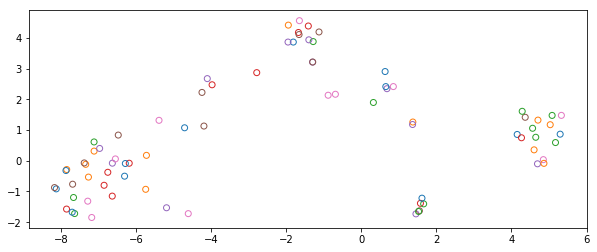

In [823]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import itertools

walk_tsne = TSNE(random_state=42)
X_walk_tsne = walk_tsne.fit_transform(embedding[trainamals + testimals, :])

# Define a color map

palette = itertools.cycle(sns.color_palette())
color_map = {}
for i, label in enumerate(set(all_labels)):
    color_map[label] = next(palette)

# Plot the train embeddings
plt.figure(figsize=(10, 4))
plt.scatter(
    X_walk_tsne[:training_size, 0],
    X_walk_tsne[:training_size, 1],
    edgecolors=[color_map[i] for i in all_labels],
    facecolors='none',
)

In [655]:
graph.nodes

NodeView((6194, 255, 980, 2992, 2507, 986, 4003, 0, 82, 15, 343, 4282, 5442, 1162, 3401, 7106, 6211, 6611, 1348, 2239, 2, 5842, 3, 3363, 1277, 3739, 6882, 4947, 5740, 5550, 4, 4087, 5, 2481, 5269, 1, 6, 6072, 3996, 448, 1673, 3079, 436, 2126, 743, 4115, 6286, 7, 2787, 1339, 8, 6926, 9, 3756, 1773, 5945, 5424, 474, 2872, 2439, 6121, 2352, 6168, 3258, 10, 6269, 11, 4291, 6536, 2054, 2677, 12, 5237, 2176, 13, 4198, 3322, 6553, 3418, 1615, 888, 1654, 4945, 5630, 5032, 23, 2339, 6726, 4949, 14, 615, 2779, 1089, 3846, 3815, 4302, 3706, 5470, 4486, 2811, 3826, 1536, 1044, 1960, 4639, 5453, 4024, 231, 2922, 2381, 954, 6448, 1376, 660, 2292, 3532, 1883, 5468, 6716, 1132, 4710, 7051, 3180, 3235, 6343, 5212, 887, 4406, 3241, 4319, 259, 3807, 1390, 1115, 16, 2444, 5892, 6315, 6079, 1752, 104, 581, 7069, 6136, 18, 4140, 19, 485, 365, 3731, 4967, 6682, 2819, 5146, 5358, 3325, 20, 559, 4482, 2156, 7054, 2580, 6299, 3704, 21, 745, 1414, 710, 4960, 4700, 6554, 1158, 22, 4543, 700, 1016, 5052, 211, 5556

In [813]:
from node2vec import Node2Vec

node2vec = Node2Vec(
    nx_graph, 
    dimensions=9, 
    walk_length=30, 
    num_walks=200, 
    workers=4
)


Computing transition probabilities: 100%|██████████| 128/128 [00:00<00:00, 392.71it/s]


In [814]:
model_n2v = node2vec.fit(window=10, min_count=1, batch_words=4)

In [815]:
model_n2v.wv.get_vector('0')

array([ 0.8447879 , -0.4109826 ,  2.29708   , -0.08607745, -0.20092544,
       -1.4858383 , -1.1105582 , -1.3699305 , -0.27720243], dtype=float32)

In [816]:
train_embeddings = np.concatenate(
    [
        model_n2v.wv.get_vector(
            str(vocab.lookup(a))
        ).reshape(1, -1)
        for a in zoo.animal_name.values[:training_size]
    ], axis=0
)
test_embeddings = np.concatenate(
    [
        model_n2v.wv.get_vector(
            str(vocab.lookup(a))
        ).reshape(1, -1)
        for a in zoo.animal_name.values[training_size:]
    ], axis=0
)

In [817]:
test_embeddings.shape

(21, 9)

In [818]:
train_embeddings[0]

array([ 0.8447879 , -0.4109826 ,  2.29708   , -0.08607745, -0.20092544,
       -1.4858383 , -1.1105582 , -1.3699305 , -0.27720243], dtype=float32)

In [819]:
clf = SVC(random_state=42)
clf.fit(
    np.concatenate(
        [
            #zoo.values[:training_size, 1:-1],
            train_embeddings,
            #cluster_membership[trainamals].reshape(-1, 1)
        ],
        axis=1
    ),
    zoo.class_type[:training_size]
)

test_labels = zoo.class_type[training_size:]
test_embeddings = np.concatenate(
    [
        #zoo.values[training_size:, 1:-1],
        test_embeddings,
        #cluster_membership[testimals].reshape(-1, 1)
    ], axis=1
)
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.7619047619047619
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 2 0 0 1]]
